## DMML: Machine Learning and Business Cases
<div style="text-align: right">
**Doreid AMMAR** <br>
Associate Professor <br>
em**lyon Business School**
</div>
## Assignment 1: Linear Regression with One Variable

## Introduction
In this programming assignment, you will implement **gradient descent for linear regression** and get to see it work on data.<br>
To get started with the assignment, you will need to download the Assignment 1 file and unzip its contents to the directory where you wish to complete the assignment. If needed, use the **cd** command in Terminal to change to this directory before starting this assignment.<br>
You can also find instructions for installing Jupyter Notebook in the “Environment Setup Instructions (Week 1)” of the course on Brightspace.

## Files included in this assignment
- <span style="color:blue">Assignment1.ipynb</span> - the Jupyter notebook for assignment 1
- <span style="color:blue">Assignment1data.npy</span> - Dataset for linear regression with one variable
- <span style="color:blue">IMG</span> - a folder containing images that are visualized in the Jupyter notebook
- <span style="color:blue">plots</span> - a folder for storing the output of assignment 1

## Instructions
Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Check your output to make sure it all looks as you expected.

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as the name of the team and the names of team members below:

In [8]:
TEAM_NAME = "TEAM #2"

TEAM_MEMBER_1 = "Prabeen Ranjan Parida"
TEAM_MEMBER_2 = "Jiani WEI"
TEAM_MEMBER_3 = "Fiona  Passoni"

## Gradient Descent for Linear Regression with One Variable
**Gradient descent** is an optimization algorithm used to find a local (or the global if you are lucky!) minimum of a function.<br>
In terms of **machine learning**, if we can express the goal of our algorithm with a **cost function**, $h_{\theta}(x)$, then the global minimum of this function will give us the point of minimal error, which is exactly what we want our algorithm to achieve!

To illustrate this, let's take the traditional example of simple **linear regression with one variable**, i.e., fitting the line of best fit to some data.

## Plotting the Data
Let’s assume we have the following data points $(x^i,y^i)$:<br>
The file <span style="color:blue">Assignment1data.npy</span> contains the dataset for our linear regression problem.

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot $(x^i,y^i)$. (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)<br>

To load this data, we will use the nummpy **np.load(file)** to load arrays from ``.npy`` files.

In [34]:
import numpy as np
# 1. Load the data file of points into the variable data_points (0.5 POINT)
# 2. Initialize X and y to data_points[:,1] and data_points[:,0], respectively (0.5 POINT)
# 3. Store the number of training examples (data points) into the variable m (1 POINT)

data_points=np.load('Assignment1data.npy')
X=data_points[:,1]
y=data_points[:,0]
m=len(data_points)

# ALSO REMOVE THE LINE BELOW WITH "raise" IN IT:



print("X = ", X, "\n\ny = ", y, "\n\n", m, "Data Points")

X =  [-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ] 

y =  [-7.85455968 -5.85743858 -5.7440291  -3.55230007 -1.76558104 -2.27831332
 -1.82847065  0.90700055  0.45154423  1.62654188  3.04118279  5.40937268
  5.11611686  7.45306016  6.67520224  9.55390349  8.65792816 10.66201707
 12.4156338  13.49435341] 

 20 Data Points


In [31]:
# Don't change or try to delete this cell, it's a hidden test for your code.


In [ ]:
# Don't change or try to delete this cell, it's a hidden test for your code.


In [ ]:
# Don't change or try to delete this cell, it's a hidden test for your code.


To plot this data:

In [35]:
import matplotlib.pyplot as plt

# Plotting our dataset of points
plt.grid()
plt.ylim([-10, 15])
plt.xlim([-2, 2])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Assignment 1 Data Points')
plt.plot(X, y, 'o', clip_on = False)
plt.show()

<Figure size 640x480 with 1 Axes>

Our plotted data should look like the figure below, with the same blue “•” markers and axis labels.

<img src="IMG/dataset.png" width="400" align="left">

## Cost Function

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.<br>
More specifically, we want to fit a straight line to this data, recall that the function for a straight line is:<br><br>

<div style="text-align: center">
$h_\theta(x) = \theta_0 + \theta_1 x$ &nbsp; (1)</div>

In [41]:
def h_x(theta_0, theta_1, x):
    # Compute h_x using equation 1 (2 POINTS)
    h_x = theta_0 + theta_1*x
    return h_x
    # ALSO REMOVE THE LINE BELOW WITH "raise" IN IT:

In [ ]:
# Don't change or try to delete this cell, it's a hidden test for your code.


So given the data above, we are trying to find the coefficients $\theta_0$ and $\theta_1$ that best represent our data. To measure how well an estimate of $\theta_0$ and $\theta_1$ represent our data, we must define a cost function over these coefficients, $J(\theta_0, \theta_1)$. In this example, we will use the average sum of squared differences for our error function and divide them by two, which essentially squares the error between the predicted value $(\theta_0 + \theta_1 x^i)$ and the actual value $(y^i)$, for each of the $m$ data points, $(x^i,y^i)$, in our dataset. More formally, $J(\theta_0, \theta_1)$ is defined as:<br><br>
 
<div style="text-align: center"> $J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$  &nbsp; (2) </div>

## Computing the Cost

In [107]:
# Don't change or try to delete this cell
def initialize_params():
    return [-8, -8] #[theta_0, theta_1]

In [52]:
for point in data_points:
    print(point[1])

-2.0
-1.7894736842105263
-1.5789473684210527
-1.368421052631579
-1.1578947368421053
-0.9473684210526316
-0.736842105263158
-0.5263157894736843
-0.3157894736842106
-0.10526315789473695
0.10526315789473673
0.3157894736842106
0.5263157894736841
0.7368421052631575
0.9473684210526314
1.1578947368421053
1.3684210526315788
1.5789473684210522
1.789473684210526
2.0


In [90]:
def cost_function(params):
    # 1. Initialize theta_0, theta_1, and cost (1 POINT)
    # 2. Compute the cost using equation 2 (3 POINTS)
        # hint:
        # 2.a. create a for loop over the data points to sum the squared differences;
        # 2.b. average the sum of squared differences and divide by 2
        # 2.c. return the cost
    #point=0
    cost=0
    theta_0=params[0]
    theta_1=params[1]
    for point in data_points:
    
       #cost = (1/2*m)*(sum((h_x(theta_0, theta_1, point[1]) - point[0])**2))
        cost = cost +(h_x(theta_0, theta_1, point[1]) - point[0])**2
    cost = cost/(2*m)     
    #point=point+1
    return cost
        
        
    # ALSO REMOVE THE LINE BELOW WITH "raise" IN IT:

In [93]:
cost_function([-8, -8])

185.38564516832554

In [94]:
# Don't change or try to delete this cell, it's a hidden test for your code.


As our cost function is only defined over two variables, we can visualize it for our data as shown below.

<img src="IMG/CostFunction.png" width="400">


As we can see there is an obvious global minimum on this surface around the point where $(\theta_0=3, \theta_1=5)$, which is precisely the parameters used to generate the toy data points above.

The **objective** of linear regression is to **minimize the cost function**.

## Gradient Descent

The goal of gradient descent is to start on a random point on this error surface $(\theta_0^0, \theta_1^0)$ and find the global minimum point $(\theta_0^∗,\theta_1^∗)$.<br>
Recall that the gradient at a point is the vector of partial derivates $(\frac{\partial}{\partial\theta_0},\frac{\partial}{\partial\theta_1})$, where the direction represents the greatest rate of increase of the function. Therefore, starting at a point on the surface, to move towards the minimum we should move in the negative direction of the gradient at that point. This is precisely what gradient descent does. More formally, gradient descent is an iterative algorithm described by the following steps:

1. Use estimates of parameters $(\theta_0, \theta_1)$ to calculate the error $J(\theta_0, \theta_1)$
2. Calculate the partial derivatives $\frac{\partial$}{\partial\theta_0} J(\theta_0, \theta_1)$ and $\frac{\partial$}{\partial\theta_1} J(\theta_0, \theta_1)$
3. calculate the new estimates:

> $\theta_0 = \theta_0 - \alpha \frac{\partial}{\partial\theta_0} J(\theta_0, \theta_1)$ &nbsp; (3.a)
<br><br>
> $\theta_1 = \theta_1 - \alpha \frac{\partial}{\partial\theta_1} J(\theta_0, \theta_1)$ &nbsp; (3.b) 

Notice the $\alpha$ variable in Step 3 above, this is called the learning rate, which controls the effect of each movement the variables make. 

In [100]:
def gradient_descent(data_points, initialize_params, calculate_derivs, cost_function,
                     max_steps = 20, learning_rate = 0.2):
    # 1. Continue this code (ref. equations 3.a and 3.b (5 POINTS)
        # hint:
        # 1.a. create a for loop over params, update params at each iteration.
        # 1.b. compute the cost
    params = initialize_params()
    theta_0 = params[0]
    theta_1 = params[1]
    cost = cost_function(params)
    all_parameters = []
    all_parameters.append((list(params), cost))

    for step in range(1, max_steps):
        derivs = calculate_derivs(data_points, params) 
        tempo0=theta_0-learning_rate*derivs[0]
        tempo1=theta_1-learning_rate*derivs[1]
        theta_0=tempo0
        theta_1=tempo1
        params=[theta_0,theta_1]
        cost = cost_function(params)
        all_parameters.append((list(params), cost))
    return all_parameters

So as you can see, the difficulty lays in the ability to calculate the partial derivatives of the error function, with respect to our parameters. For our example error function above we get the following results:

>$\frac{\partial$}{\partial\theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$  &nbsp; (4.a)
<br><br>
> $\frac{\partial$}{\partial\theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} x^{(i)} (h_\theta(x^{(i)}) - y^{(i)})$ &nbsp; (4.b)

Now, all we need to do is determine the learning rate to use (which is the topic of a field called hyperparameter optimization) and how many steps to perform gradient descent for.

In [101]:
gradient_descent(data_points, initialize_params, calculate_derivs, cost_function,
                     max_steps = 20, learning_rate = 0.2)

[([-8, -8], 185.38564516832554),
 ([-5.834168351179835, -4.138425650405612], 100.70575261273459),
 ([-4.101503032123702, -1.4149995301653595], 55.57611707868315),
 ([-2.715370776878796, 0.5057325756882924], 31.20229274178259),
 ([-1.6064649726828713, 1.8603541661324472], 17.845875111380842),
 ([-0.7193403293261313, 2.8157188667614825], 10.413342744718012),
 ([-0.009640614640739509, 3.489502392468276], 6.2114046673379555),
 ([0.558119157107574, 3.9646970895456985], 3.7981607697004365),
 ([1.0123269745062247, 4.299834402221355], 2.3909642499819506),
 ([1.3756932284251453, 4.536194401687344], 1.5586408054663192),
 ([1.6663862315602818, 4.702890401310725], 1.0599171661685323),
 ([1.898940634068391, 4.8204549484135315], 0.7576272831506754),
 ([2.0849841560748783, 4.903368892159721], 0.5725643931316913),
 ([2.2338189736800684, 4.9618450419596645], 0.4583035816380748),
 ([2.35288682776422, 5.003086116029099], 0.38725549859397146),
 ([2.448141111031542, 5.032171926162279], 0.34281873056527074)

In [97]:
def calculate_derivs(data_points, params):
    # 1. Continue this code (ref. equations 4.a and 4.b and return "derivs"(4 POINTS)
    # test: calculate_derivs(data_points, [-8, -8]) is equal to [-10.829158244100828, -19.30787174797194]
    theta_0 = params[0]
    theta_1 = params[1]
    derivs = [0, 0]
    derivs0 = 0
    derivs1 = 0
    for point in data_points:
        y = point[0]
        x = point[1]
        derivs0=derivs0+(h_x(theta_0, theta_1, x) - y)/m
        derivs1=derivs1+((h_x(theta_0, theta_1, x) - y)*x)/m
    derivs =[derivs0, derivs1]
    return derivs 
   

In [81]:
calculate_derivs(data_points, [-8, -8])

[-10.829158244100826, -19.307871747971937]

In [ ]:
# Don't change or try to delete this cell, it's a hidden test for your code.


In [ ]:
# Don't change or try to delete this cell, it's a hidden test for your code.


## Running Gradient Descent

In [104]:
# 1. initialize max_steps to 25, learning_rate = 0.2
# 2. Run Gradient Descent and store results into the variable parameters (2 POINTS)


parameters=gradient_descent(data_points, initialize_params, calculate_derivs, cost_function,
                     max_steps = 20, learning_rate = 0.2)
print("Theta_0 = ", parameters[-1][0][0], "\nTheta_1 = ", parameters[-1][0][1], "\nCost = ", parameters[-1][1])

Theta_0 =  2.6730936263956484 
Theta_1 =  5.08455132087373 
Cost =  0.2790590539156952


## Visualizing the Error Surface

In [105]:
def plot_error_surface(ax):
    theta_0 = theta_1 = np.arange(-8.0, 20.0, 0.05)
    THETA_0, THETA_1 = np.meshgrid(theta_0, theta_1)
    error = np.array([cost_function([theta_0, theta_1]) for theta_0, theta_1 in zip(np.ravel(THETA_0), np.ravel(THETA_1))])
    Error = error.reshape(THETA_1.shape)
    ax.plot_surface(THETA_0, THETA_1, Error, cmap = 'gist_rainbow_r', alpha = 0.25)

plotting error surface and steps...(this could take a few minutes)


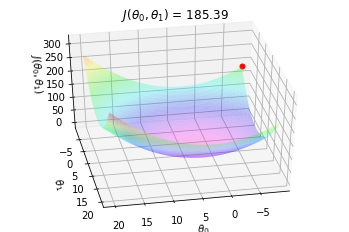

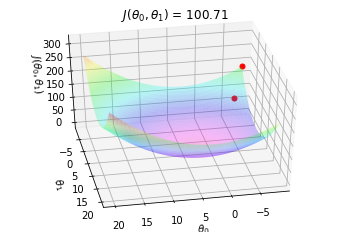

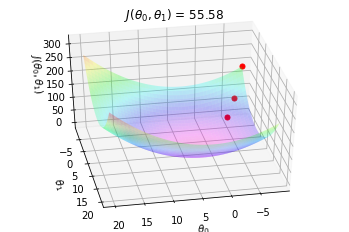

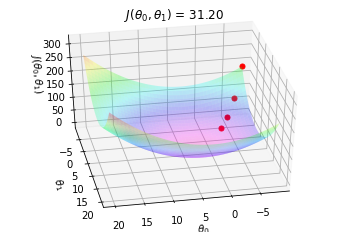

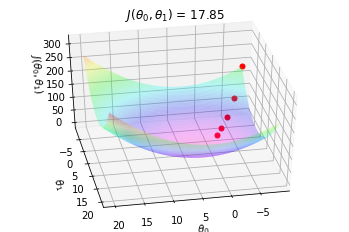

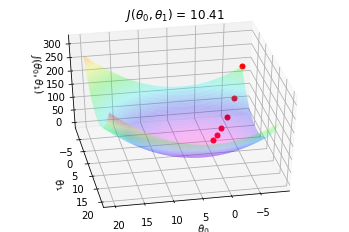

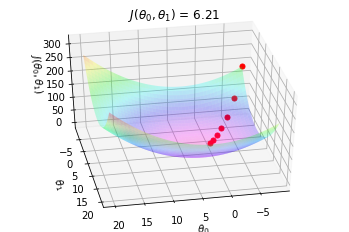

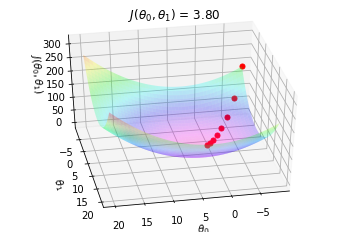

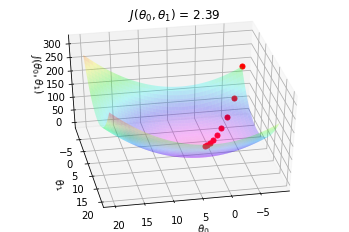

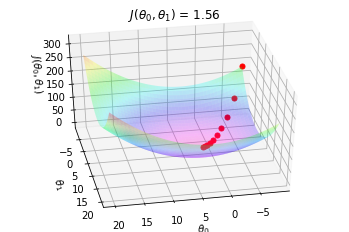

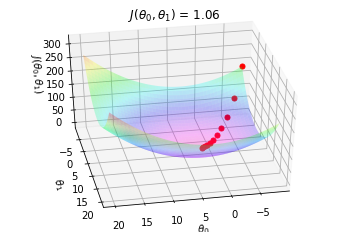

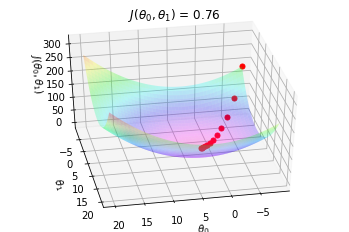

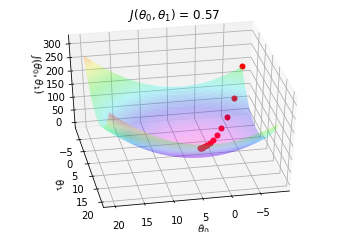

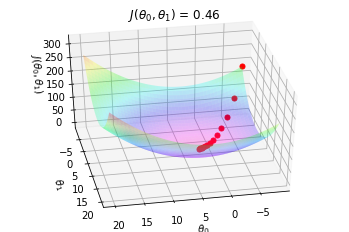

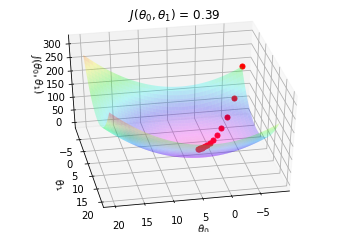

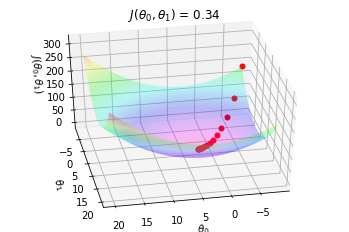

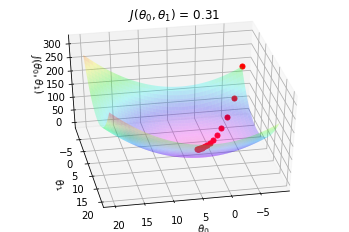

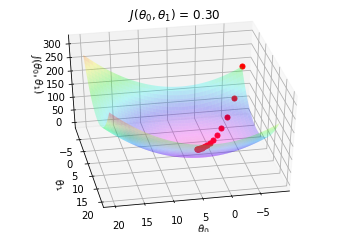

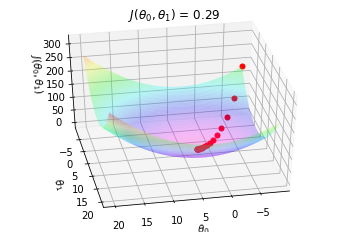

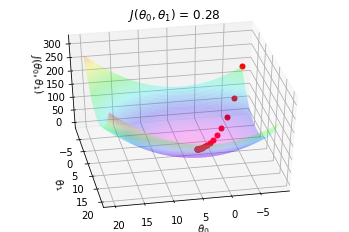

In [106]:
from mpl_toolkits.mplot3d import Axes3D

print('plotting error surface and steps...(this could take a few minutes)')
count = 0
for i in range(0, len(parameters)):
    error_fig = plt.figure()
    error_surface = error_fig.add_subplot(111, projection = '3d')
    #Plot original error surface
    plot_error_surface(error_surface)
    #plt.rc('text', usetex=True)
    error_surface.set_xlabel(r'$\theta_0$')
    error_surface.set_ylabel(r'$\theta_1$')
    error_surface.set_zlabel(r'$J(\theta_0, \theta_1)$')
    error_surface.view_init(elev = 40, azim = 79)

    err = 0
    for j in range(0, i + 1):
        param = parameters[j]
        theta_0 = param[0][0]
        theta_1 = param[0][1]
        err = param[1]
        #draw point
        error_surface.scatter(theta_0, theta_1, err ,color = "r", s = 25)

    error_surface.set_title(r'$J(\theta_0, \theta_1)$ = %.2f' % err)
    plt.savefig('plots/error_surface/error_surface-' + str(count) + '.png', bbox_inches='tight', pad_inches=0.0)
    count = count + 1 

## Visualizing Line Graph

In [ ]:
import numexpr as ne

def save_line_graph(theta_0, theta_1, data_points, out_file):
    fig = plt.figure()
    subplot = fig.add_subplot(111)
    subplot.set_xlabel('x')
    subplot.set_ylabel('y')
    subplot.set_title(r'$\theta_0$ = %.2f    $\theta_1$ = %.2f' % (theta_0 , theta_1))
    for point in data_points:
        y = point[0]
        x = point[1]
        subplot.plot(x, y, 'bo', clip_on = False)

    x = np.linspace(-2.0, 2.0, 100)
    y = ne.evaluate('theta_0 + theta_1 * x', local_dict = {'x': x, 'theta_0': theta_0, 'theta_1': theta_1})

    subplot.plot(x, y, 'r')
    subplot.grid()
    plt.ylim([-15, 15])
    plt.xlim([-2, 2])

    plt.savefig(out_file, bbox_inches='tight', pad_inches=0.0)

In [ ]:
print('plotting line graphs')
count = 0
for params in parameters:
    theta_0 = params[0][0]
    theta_1 = params[0][1]
    save_line_graph(theta_0, theta_1, data_points, 'plots/line_graphs/line_graph-' + str(count) + '.png')
    count = count + 1

## Selecting Learning Rates

In this part of the assignment, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the variable `learning_rate`

<img src="IMG/selecting learning rates.png" width="900">

If you picked a learning rate within a good range, **gradient descent can converge** quickly to a local minimum (see C)

In [ ]:
# Run Gradient Descent using different values of max-steps (e.g., max-steps = 5, 25, 50) and learning_rate
# 1. Give an example were the learning_rate falls into A (run gradient descent for about 25 iterations)
#    Store the value into the variable learning_rate_A (2 POINTS)

# TYPE YOUR CODE HERE.
# ALSO REMOVE THE LINE BELOW WITH "raise" IN IT:
raise NotImplementedError()

In [ ]:
# Run Gradient Descent using different values of max-steps and learning_rate
# 1. Give an example were the learning_rate falls into B (run gradient descent for about 25 iterations)
#    Store the value into the variable learning_rate_B (2 POINTS)

# TYPE YOUR CODE HERE.
# ALSO REMOVE THE LINE BELOW WITH "raise" IN IT:
raise NotImplementedError()

In [ ]:
# Run Gradient Descent using different values of max-steps and learning_rate
# 1. Give an example were the learning_rate falls into C (run gradient descent for about 25 iterations)
#    Store the value into the variable learning_rate_C (2 POINTS)

# TYPE YOUR CODE HERE.
# ALSO REMOVE THE LINE BELOW WITH "raise" IN IT:
raise NotImplementedError()

## Submission

Congrats! You're Done!<br>
Upload this file to your Dropbox (**double check** your **TEAM NAME** and **NAMES of TEAM MEMBERS** are at the top, and the Notebook **title hasn't been changed**).